<a href="https://colab.research.google.com/github/Abhilash11Addanki/DeepLearning/blob/main/Handwritten_Digits(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
#Printing the shapes of Train and Test data
print(train_images.shape,train_labels.shape)
print(test_images.shape,test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


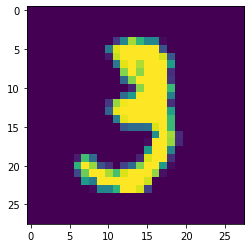

In [5]:
plt.imshow(train_images[10])

In [6]:
#Normalizing the Data
train_images = train_images/255
test_images = test_images/255

In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(units = 128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(units = 64,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(units = 10, activation=tf.nn.softmax)])

In [8]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [9]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs = {}):
    if(logs.get('accuracy')>=0.99):
      print("\nReached 99% accuracy so cancelling training")
      self.model.stop_training = True

In [10]:
model.fit(train_images,train_labels,epochs=10,callbacks=[myCallback()])

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4158 - accuracy: 0.8796
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1053 - accuracy: 0.9687
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0723 - accuracy: 0.9775
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0539 - accuracy: 0.9829
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0419 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0291 - accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0273 - accuracy: 0.9909

Reached 99% accuracy so cancelling training


In [11]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0844 - accuracy: 0.9779


[0.08442668616771698, 0.9779000282287598]

**Using Convolution Layers**

In [12]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [13]:
train_images = train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

In [14]:
train_images = train_images/255
test_images = test_images/255

In [15]:
conv_model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D((2,2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(units = 128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(units = 64,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(units = 10, activation=tf.nn.softmax)])

In [16]:
conv_model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [17]:
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               102528    
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [18]:
conv_model.fit(train_images,train_labels,epochs = 10,callbacks=[myCallback()])

Epoch 1/10
1875/1875 [==============================] - 35s 3ms/step - loss: 0.3340 - accuracy: 0.8951
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0524 - accuracy: 0.9837
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0344 - accuracy: 0.9888
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0256 - accuracy: 0.9918

Reached 99% accuracy so cancelling training


In [19]:
conv_model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0422 - accuracy: 0.9859


[0.04217153787612915, 0.9858999848365784]